In [13]:
import copy
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cmocean as cmo

In [4]:
# load data
data = np.load("sentinel2_rochester.npy")
data_copy = copy.deepcopy(data)
# data_copy

In [5]:
# defining the labels for each band
labels = [
            "B1 - 60 m - 443 nm - Ultra Blue (Coastal and Aerosol)",
            "B2 - 10 m - 490 nm - Blue",
            "B3 - 10 m - 560 nm - Green",
            "B4 - 10 m - 665 nm - Red",
            "B5 - 20 m - 705 nm - VNIR",
            "B6 - 20 m - 740 nm - VNIR",
            "B7 - 20 m - 783 nm - VNIR",
            "B8a - 20 m - 865 nm - VNIR",
            "B9 - 60 m - 940 nm - SWIR",
            "B10 - 60 m - 1375 nm - SWIR",
            "B11 - 20 m - 1610 nm - SWIR",
            "B12 - 20 m - 2190 nm - SWIR"
]


In [6]:
#exploring what this is
print(f"height , width, bands: ",data_copy.shape,"\ndtype: ",data_copy.dtype)
arr_level_stats = []
for i in range(data_copy.shape[-1]):
    arr = data_copy[i]
    band = i
    min = np.min(arr)
    max = np.max(arr)
    mean = np.mean(arr)
    std = np.std(arr)
    arr_level_stats.append([band, min, max, mean, std])
    # print(f"band ",i,"\t","min: ",arr.min(),"max: ",arr.max(), "mean: ",arr.mean(),"std: ",arr.std())
cols = ['band', 'min', 'max', 'mean', 'std']
data_desc_stats = pd.DataFrame(arr_level_stats,columns=cols)
# data_desc_stats
# data_desc_stats.to_csv("outputs\desc_stats.csv", index=False)


height , width, bands:  (954, 716, 12) 
dtype:  float64


In [8]:
#prob 1: handling of no data with nan replacement
def replace_with_nan(arr: np.ndarray, no_data_value = 0):
    nan_replaced = arr.astype(float, copy=True)
    nan_replaced[arr == no_data_value] = np.nan # dam i love the automcomplete here lol
    return nan_replaced
no_nan_data = replace_with_nan(data_copy, no_data_value = 0)
# no_nan_data

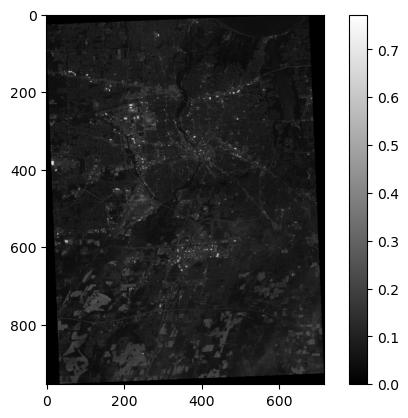

In [9]:
band_plot = data_copy[:,:,3]
# cmap = plt.cm.gray.copy()
# cmap.set_bad(color='white')
plt.imshow(band_plot, cmap = "gray")
plt.colorbar()



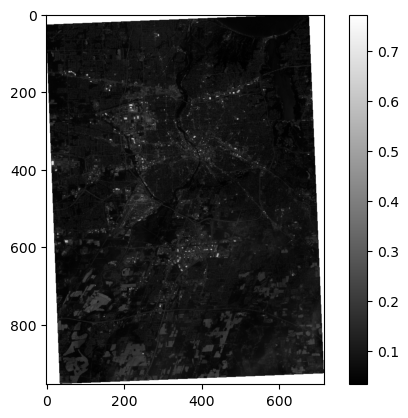

In [10]:
another = no_nan_data[:,:,3]
plt.imshow(another, cmap = "gray")
plt.colorbar()

In [11]:
"""regular gray scale per each band"""
# for i in range(no_nan_data.shape[-1]):
#     plt.imshow(no_nan_data[:,:,i], cmap = "gray")
#     plt.title(f"{labels[i]}")
#     plt.colorbar()
#     plt.show()
# every one of them looks a bit different

'regular gray scale per each band'

In [12]:
"""
Stretching is needed to improve the contrast.
Read online and will be implement a 98 percentile till 90 percentile stretch and decide which one's better for improved constrast.
"""

"\nStretching is needed to improve the contrast.\nRead online and will be implement a 98 percentile till 90 percentile stretch and decide which one's better for improved constrast.\n"

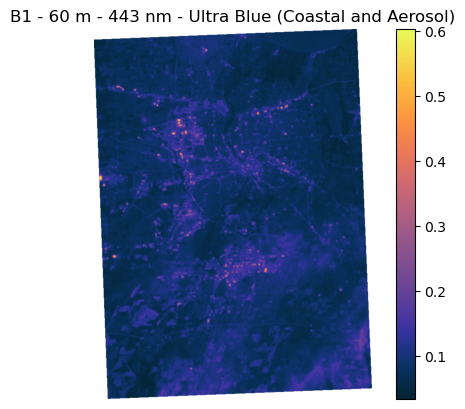

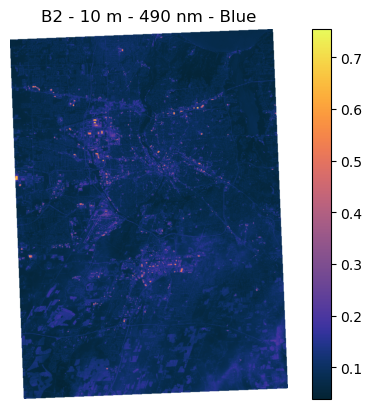

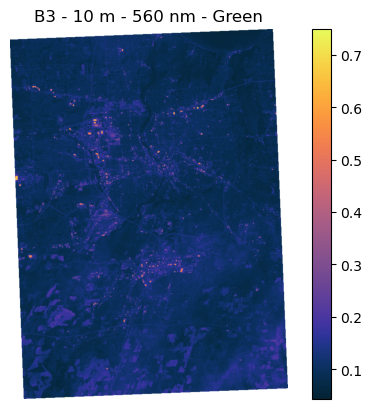

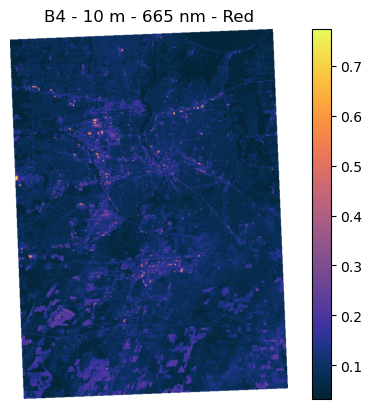

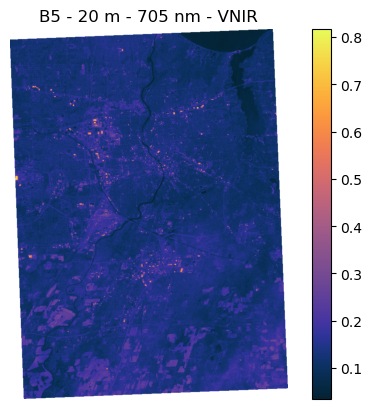

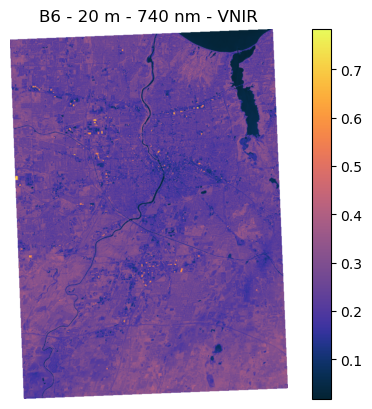

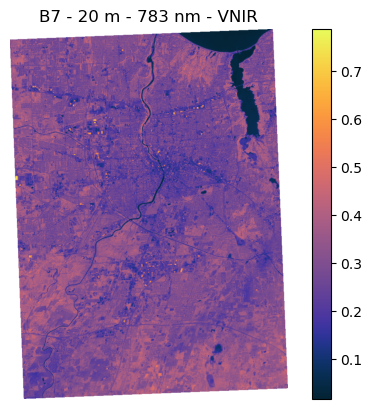

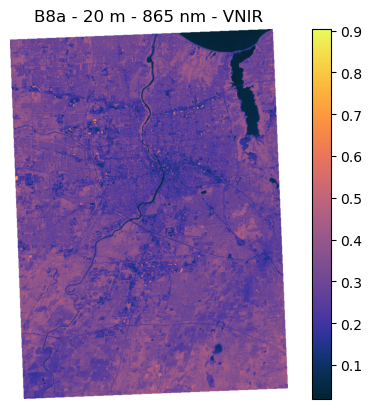

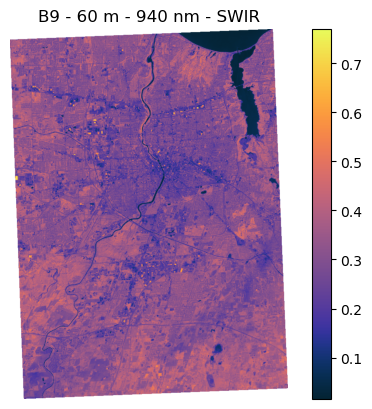

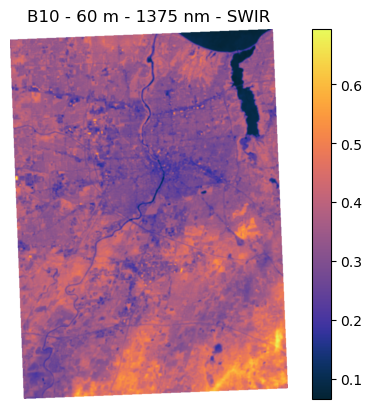

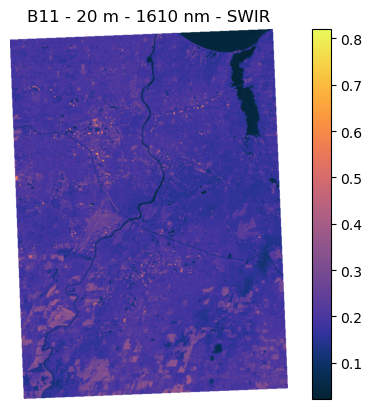

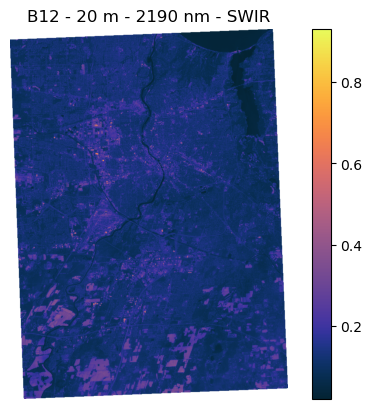

In [107]:
for i in range(no_nan_data.shape[-1]):
    band = no_nan_data[:,:,i]
    cmap = cmo.cm.thermal.copy()           # 'thermal','haline','solar','ice','gray','oxy','deep','dense','algae','matter','turbid','speed','amp''tempo' 'rain','phase','topo','balance','delta','curl','diff','tarn'
    cmap.set_bad("white")
    plt.imshow(band, cmap = cmap)
    plt.title(labels[i])
    plt.axis("off")
    plt.colorbar()
    plt.show()

In [70]:
def minmax_stretch(img):
    low = np.nanmin(img)
    high = np.nanmax(img)
    output = (img-low)/(high-low)
    return np.clip(output, 0, 1).astype(np.float32) #ensuring consistency in datatypes and clipping the output since did normalization.


def percentile_stretch(img, low_perc=2, high_per=98):
    low = np.nanpercentile(img, low_perc)
    high = np.nanpercentile(img, high_per)
    output = (img-low)/(high-low)
    return np.clip(output, 0, 1).astype(np.float32)

In [106]:
# band = no_nan_data[:,:,3]
# plt.imshow(band, cmap = cmo.cm.balance)
# plt.title(f"raw - {labels[3]}")
#


In [105]:
# plt.imshow(minmax_stretch(band), cmap = cmo.cm.balance)
# plt.title(f"minmax_stretch - {labels[3]}")

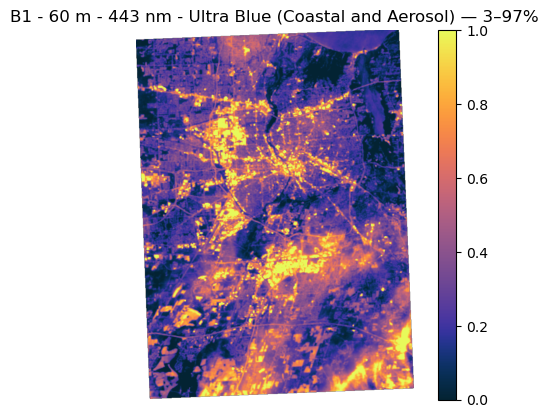

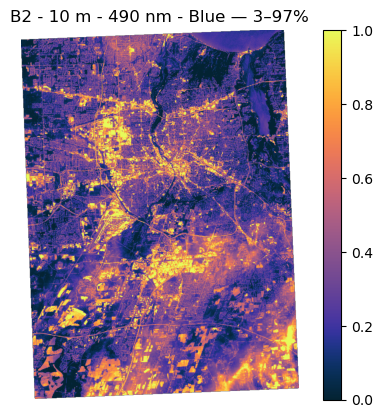

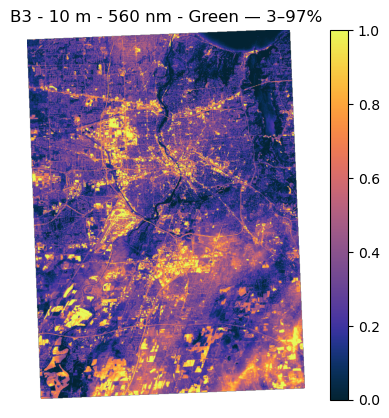

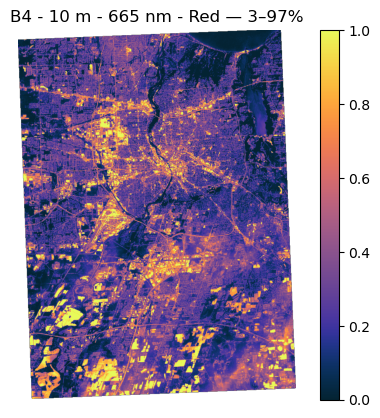

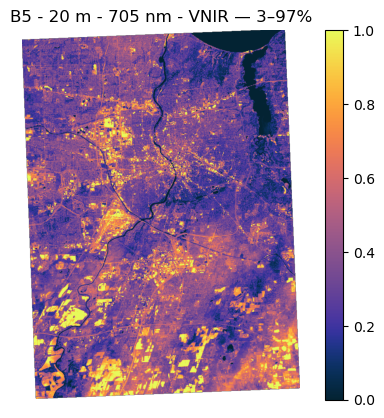

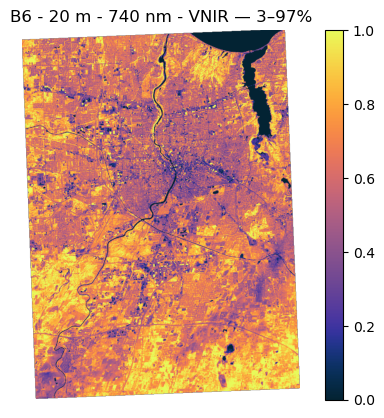

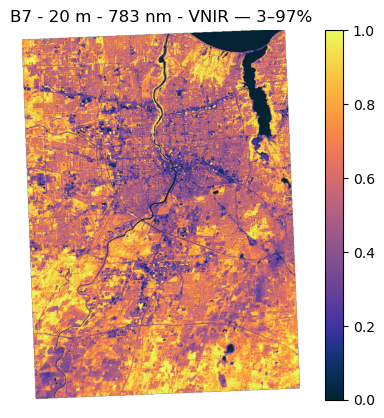

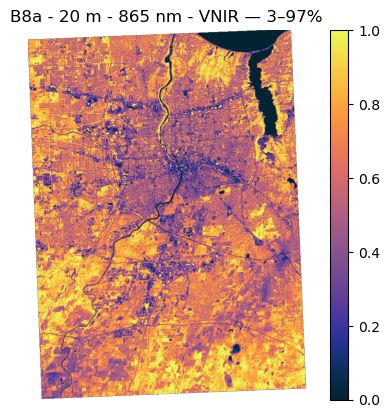

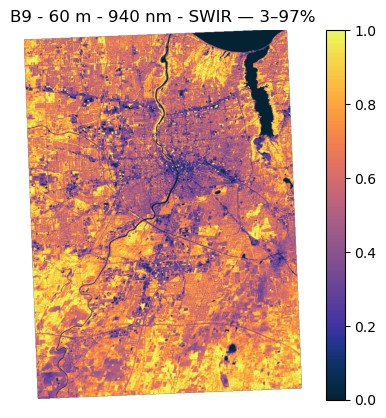

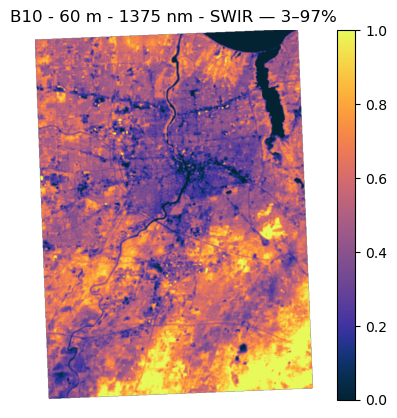

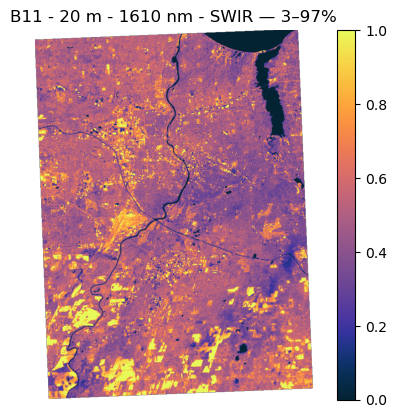

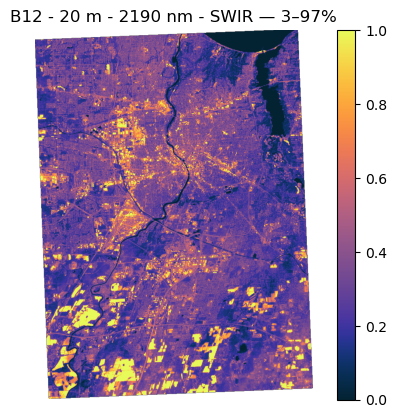

In [111]:
# plt.imshow(percentile_stretch(band, 4, 96), cmap = cmo.cm.balance)
# plt.title(f"percentile_stretch - {labels[3]}")
lo = 3
hi = 97
for i in range(no_nan_data.shape[-1]):
    band = no_nan_data[:,:,i]
    plt.imshow(percentile_stretch(band, lo, hi), cmap=cmo.cm.thermal) #phase, haline, balance #but thermal looks better able to separate vegeation and water bodies | B12 looks crazy but unsure why white background
    plt.title(f"{labels[i]} — {lo}–{hi}%")
    plt.axis('off')
    plt.colorbar()
    plt.show()

In [117]:
x = no_nan_data.reshape(-1, no_nan_data.shape[-1]) # 3d to 2d
x_dropped_nans = np.all(np.isfinite(x), axis=1) #dropped off nans
x_no_nans = x[x_dropped_nans]
x_no_nans
corr = np.corrcoef(x_no_nans, rowvar=False)
corr

array([[ 1.        ,  0.85750904,  0.83243857,  0.81030606,  0.7584873 ,
         0.0541286 , -0.07168136, -0.08151991, -0.0922931 ,  0.10861078,
         0.50486681,  0.63521745],
       [ 0.85750904,  1.        ,  0.97938476,  0.95575873,  0.87866721,
         0.07279529, -0.07003028, -0.08185211, -0.09260358,  0.06342381,
         0.59224696,  0.72619085],
       [ 0.83243857,  0.97938476,  1.        ,  0.96236179,  0.94454674,
         0.2201988 ,  0.07348687,  0.06372962,  0.05278966,  0.16460206,
         0.7016504 ,  0.77468477],
       [ 0.81030606,  0.95575873,  0.96236179,  1.        ,  0.92481268,
         0.05083602, -0.09540027, -0.10469975, -0.10885243,  0.02122982,
         0.70850061,  0.85784639],
       [ 0.7584873 ,  0.87866721,  0.94454674,  0.92481268,  1.        ,
         0.39122757,  0.24828551,  0.24107498,  0.23971026,  0.30787626,
         0.86410647,  0.85142261],
       [ 0.0541286 ,  0.07279529,  0.2201988 ,  0.05083602,  0.39122757,
         1.        ,  

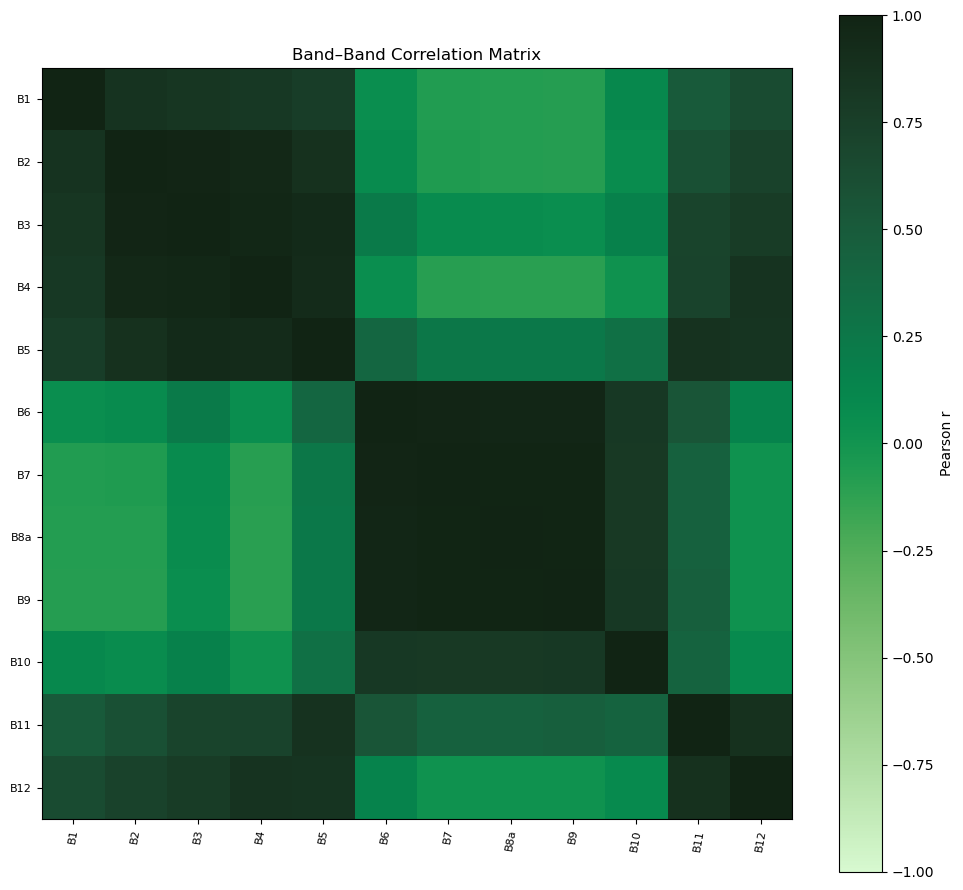

In [130]:
plt.figure(figsize=(10,9))
im = plt.imshow(corr, vmin=-1, vmax=1, cmap=cmo.cm.algae)
plt.colorbar(im, label="Pearson r")
plt.title("Band–Band Correlation Matrix")
plt.xticks(range(len(labels)), [lb.split()[0] for lb in labels], rotation=80, fontsize=8)
plt.yticks(range(len(labels)), [lb.split()[0] for lb in labels], fontsize=8)
plt.tight_layout()
plt.show()